# Machine Learning for Mobile Communication Systems - Data exploration

The dataset reports the activity of one LTE cell in Madrid, El Rastro neighborhood. 
The observation period comprises the temporal window between the end of June and the beginning of August 2016 (06/29 - 08/09) that includes six weeks of information.

The dataset contains the following information:
 - 0 - **overalltime**: in seconds, starting from the initial date of the measurements (29/06/2016)
 - 1 - **overallusers**: number of transmitting users
 - 2 - **overallrbdw**: total number of resource blocks in downlink
 - 3 - **overallrbdwmean**: mean number of resource blocks in downlink
 - 4 - **overallrbdwstd**: standard deviation of resource blocks in downlink
 - 5 - **overallratedw**: rate (bit/s) in downlink
 - 6 - **overallratedwmean**: mean rate (bit/s) in downlink
 - 7 - **overallratedwstd**: standard deviation of rate in downlink
 - 8 - **overallmsgdw**: number of messages in downlink
 - 9 - **overallretxdw**: number of retransmitted packets in downlink
 - 10 - **overallrbup**: total number of resource blocks in uplink
 - 11 - **overallrbupmean**: mean number of resource blocks in uplink
 - 12 - **overallrbupstd**: standard deviation of resource blocks in uplink
 - 13 - **overallrateup**: rate (bit/s) in uplink
 - 14 - **overallrateupmean**: mean rate (bit/s) in uplink
 - 15 - **overallrateupstd**: standard deviation rate (bit/s) in downlink
 - 16 - **overallmsgup**: number of messages in uplink
 - 17 - **overallretxup**: number of retransmitted packets in uplink 

 Keywords, high level meaning:
  - Resource Block: essentially is a resource that must allocated when an application needs more data to be transmitted (i.e. the base stations allocates more bandwidth to transmit more symbols)
  - message: ?
  - packet: packet of information, does not contain always the same amount of data, it always depends on the application, bandwidth, etc...


## Problem Statement
let us split D in $6$ portions $(D_1, D_2, D_3, D_4, D_5, D_6)$, being one portion equal to one week
(604800 seconds). It is requested:
1. for each $D_i, (i=1, 2, 3, 4, 5, 6)$, build one model based on artificial neural networks able to
automatically predict `overallusers, overallratedw, overallrateup`, at time instant $t+1, t+2, \dots, t+N$,
with $N=10$. Select the most appropriate inputs to get the outputs requested with the lowest error.
You can use one of the artificial neural network architectures introduced in the lessons (e.g., Multi-
layer Perceptrons, Convolutional Neural Networks, Recurrent Neural Networks) or a combination
of those.
2. create a federated global model using FedAvg algorithm, which is merging the local knowledge
of the 6 datasets $D_i$ and is performing the same task, i.e., prediction of `overallusers, overallratedw,
overallrateup`, at time instant $t+1, t+2, \dots, t+N$, with $N=10$.
3. Evaluate the accuracy of the 4 (?) local models and compare it with that achieved by the global
model. For this, carefully identify the test sets to be used for the evaluation.

In [1]:
import os
import datetime

import numpy as np
import  matplotlib.pyplot as plt
import pandas as pd

In [2]:
data_path = "data"
data_file_name = "rastro.csv"

In [3]:
# load csv file in data with pandas

def load_data_pandas(file_name):
    return pd.read_csv(os.path.join(data_path, file_name))

def load_data_numpy(file_name):
    return np.loadtxt(os.path.join(data_path, file_name), delimiter=',')

# load data
data = load_data_pandas(data_file_name)

In [4]:
data.head(10)

,overalltime,overallusers,overallrbdw,overallrbdwmean,overallrbdwstd,overallratedw,overallratedwmean,overallratedwstd,overallmsgdw,overallretxdw,overallrbup,overallrbupmean,overallrbupstd,overallrateup,overallrateupmean,overallrateupstd,overallmsgup,overallretxup
0,82561,9,319,12.269231,11.622591,39608,1523.384615,3244.587901,26,0,1478,6.627803,8.242416,245424.0,1100.556054,2047.784524,191.0,32.0
1,82562,9,603,11.377358,11.724771,34440,649.811321,1168.622217,50,3,1169,5.488263,5.772912,140032.0,657.427230,673.679666,165.0,48.0
2,82563,9,545,12.976190,14.322910,60688,1444.952381,3106.136530,41,1,814,3.786047,6.354099,163304.0,759.553488,1388.000197,157.0,58.0
3,82564,10,725,10.661765,11.306596,55736,819.647059,1822.320480,68,0,1236,3.340541,3.289588,246064.0,665.037838,516.984506,316.0,54.0
4,82565,11,15402,40.638522,16.144476,4405688,11624.506596,8239.047939,332,47,2825,6.907090,8.484483,333720.0,815.941320,868.953391,368.0,41.0
5,82566,10,27526,45.648425,10.935287,10755664,17836.922056,7207.307349,563,40,1812,4.507463,2.731765,265560.0,660.597015,383.391925,361.0,41.0
6,82567,12,2173,28.220779,20.642077,570656,7411.116883,8215.515504,71,6,1002,3.643636,1.833465,177536.0,645.585455,289.170351,236.0,39.0
7,82568,10,393,15.115385,15.953249,60816,2339.076923,4569.509286,26,0,689,3.664894,2.720381,116240.0,618.297872,375.499719,152.0,36.0
8,82569,9,363,21.352941,20.645645,75736,4455.058824,5735.621942,17,0,457,3.026490,2.193770,77936.0,516.132450,424.039097,101.0,50.0
9,82570,7,17841,40.732877,15.185335,4360528,9955.543379,4948.471079,433,5,2404,7.856209,6.577576,206528.0,674.928105,546.418732,278.0,28.0


In [5]:
def get_date_from_overalltime(overalltime):
    # Set the starting date as 29 june 2016 using the datetime module
    start_date = datetime.datetime(2016, 6, 29)

    # Get the first date which is the starting date plus the number of seconds
    date = start_date + datetime.timedelta(seconds=overalltime)
    return date

print(str(get_date_from_overalltime(82561)))

2016-06-29 22:56:01


In [6]:
# Summary statistics of the data
data.describe()

,overalltime,overallusers,overallrbdw,overallrbdwmean,overallrbdwstd,overallratedw,overallratedwmean,overallratedwstd,overallmsgdw,overallretxdw,overallrbup,overallrbupmean,overallrbupstd,overallrateup,overallrateupmean,overallrateupstd,overallmsgup,overallretxup
count,2.389749e+06,2.389749e+06,2.389749e+06,2.131143e+06,2.131143e+06,2.389749e+06,2.131143e+06,2.131143e+06,2.389749e+06,2.389749e+06,2.389749e+06,2.376704e+06,2.376704e+06,2.389747e+06,2.376702e+06,2.376702e+06,2.389748e+06,2.389748e+06
mean,1.370620e+06,4.757134e+00,1.045938e+03,1.369516e+01,9.902240e+00,2.587851e+05,2.264550e+03,2.423769e+03,3.517717e+01,1.907851e+00,7.935114e+02,4.115694e+00,3.982954e+00,8.749586e+04,4.331857e+02,5.303794e+02,1.016137e+02,5.679121e+01
std,7.468662e+05,3.205597e+00,3.845251e+03,1.110065e+01,7.060188e+00,1.142466e+06,4.117831e+03,3.514114e+03,8.476111e+01,7.976470e+00,1.664328e+03,2.936528e+00,3.025049e+00,2.673897e+05,4.195570e+02,5.416844e+02,1.261370e+02,8.683475e+01
min,8.256100e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,7.080720e+05,2.000000e+00,9.000000e+00,6.000000e+00,3.105295e+00,4.160000e+02,2.360000e+02,1.678571e+02,2.000000e+00,0.000000e+00,1.110000e+02,2.359375e+00,1.753814e+00,1.072000e+04,2.372864e+02,2.965250e+02,1.500000e+01,1.300000e+01
50%,1.412272e+06,4.000000e+00,1.140000e+02,1.044444e+01,1.038775e+01,5.240000e+03,4.968889e+02,5.769991e+02,1.100000e+01,0.000000e+00,3.630000e+02,3.433735e+00,3.641085e+00,4.115200e+04,4.018286e+02,3.978654e+02,6.000000e+01,2.700000e+01
75%,2.022124e+06,6.000000e+00,4.860000e+02,1.800000e+01,1.618316e+01,4.967200e+04,2.114286e+03,3.815111e+03,3.200000e+01,0.000000e+00,9.680000e+02,5.247423e+00,5.398765e+00,1.048000e+05,5.782222e+02,6.146724e+02,1.430000e+02,5.400000e+01
max,2.631894e+06,3.200000e+01,4.803300e+04,5.100000e+01,3.323402e+01,4.767835e+07,6.957288e+04,3.871551e+04,1.956000e+03,5.370000e+02,4.135400e+04,4.800000e+01,3.323402e+01,1.774178e+07,2.140142e+04,1.427790e+04,2.395000e+03,1.124000e+03


In [7]:
# Check the amount of missing values for each features
data.isnull().sum()

overalltime               0
overallusers              0
overallrbdw               0
overallrbdwmean      258606
overallrbdwstd       258606
overallratedw             0
overallratedwmean    258606
overallratedwstd     258606
overallmsgdw              0
overallretxdw             0
overallrbup               0
overallrbupmean       13045
overallrbupstd        13045
overallrateup             2
overallrateupmean     13047
overallrateupstd      13047
overallmsgup              1
overallretxup             1
dtype: int64

## Find out time gaps in the raw measurements

In [8]:
# Check if the first feature increases by 1 for each row, if not, find the row where it doesn't
row_idxs = []
time_gap_widths = []
for i in range(1, len(data)):
    # if i > 10000:
        # break
    if i % 100000 == 0:
        print(f"Checking row {i}")
    if data.iloc[i, 0] != data.iloc[i-1, 0] + 1:
        # print(f"Time difference between row {i} and {i+1} is {data.iloc[i, 0] - data.iloc[i-1, 0]}")
        time_gap_widths.append(data.iloc[i, 0] - data.iloc[i-1, 0])
        row_idxs.append(i)

Checking row 100000
Checking row 200000
Checking row 300000
Checking row 400000
Checking row 500000
Checking row 600000
Checking row 700000
Checking row 800000
Checking row 900000
Checking row 1000000
Checking row 1100000
Checking row 1200000
Checking row 1300000
Checking row 1400000
Checking row 1500000
Checking row 1600000
Checking row 1700000
Checking row 1800000
Checking row 1900000
Checking row 2000000
Checking row 2100000
Checking row 2200000
Checking row 2300000


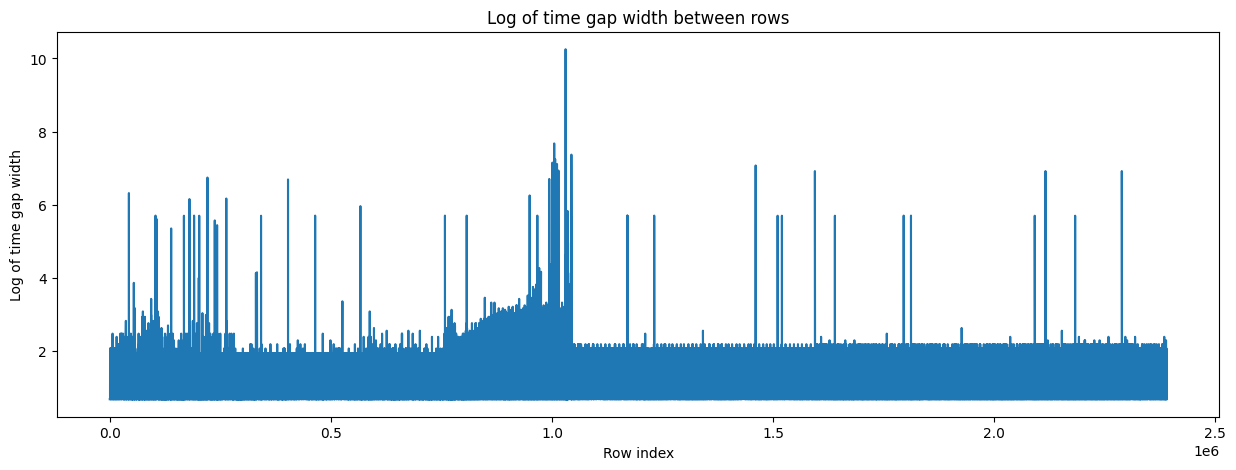

In [9]:
plt.figure(figsize=(15, 5))
plt.plot(row_idxs, np.log(time_gap_widths))
plt.xlabel("Row index")
plt.ylabel("Log of time gap width")
plt.title("Log of time gap width between rows")
plt.show()

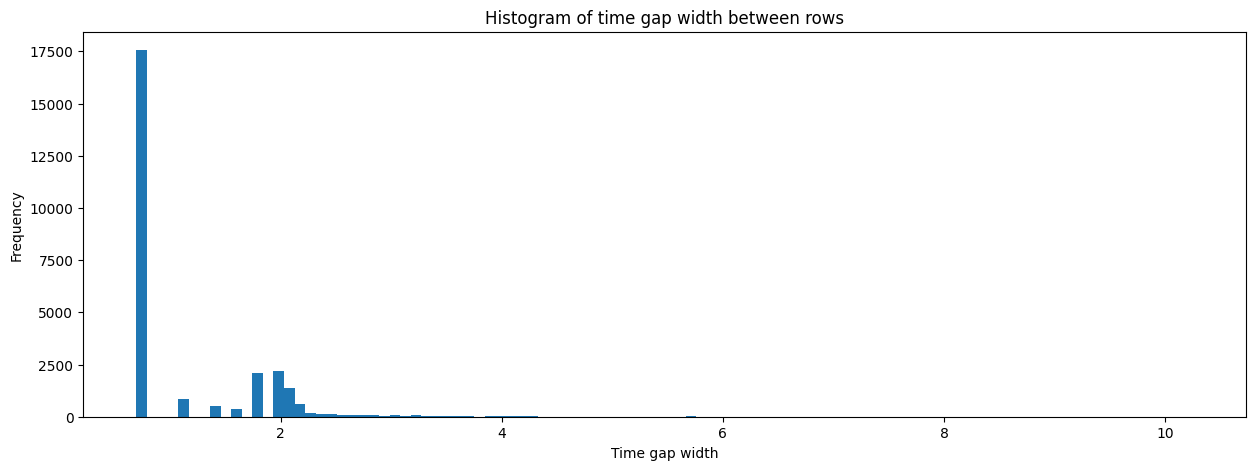

In [10]:
plt.figure(figsize=(15, 5))
plt.hist(np.log(time_gap_widths), bins=100)
plt.xlabel("Time gap width")
plt.ylabel("Frequency")
plt.title("Histogram of time gap width between rows")
plt.show()


In [11]:
# Count how many times time gap width is less than 3
time_gap_widths = np.array(time_gap_widths)
print(f"Number of time gap widths less than 3: {np.sum(time_gap_widths <= 3)}")
print(f"Number of time gap widths more than than 3: {np.sum(time_gap_widths > 3)}")

Number of time gap widths less than 3: 18417
Number of time gap widths more than than 3: 8459


In [29]:
# Scan the data to find the size of the consecutive time ranges
def find_consecutive_ranges(data):
    consecutive_ranges = []

    start_idx = data.iloc[0,0]
    consecutive_range_start = start_idx
    consecutive_range_end = start_idx

    for i in range(1, len(data)):
        if i % 100000 == 0:
            print(f"Checking row {i}")
        if data.iloc[i, 0] == data.iloc[i-1, 0] + 1:
            consecutive_range_end += 1
        else:
            consecutive_ranges.append((consecutive_range_start - start_idx, consecutive_range_end - start_idx))
            consecutive_range_start = data.iloc[i, 0]
            consecutive_range_end = data.iloc[i, 0]

    return consecutive_ranges

consecutive_ranges = find_consecutive_ranges(data)

Checking row 100000
Checking row 200000
Checking row 300000
Checking row 400000
Checking row 500000
Checking row 600000
Checking row 700000
Checking row 800000
Checking row 900000
Checking row 1000000
Checking row 1100000
Checking row 1200000
Checking row 1300000
Checking row 1400000
Checking row 1500000
Checking row 1600000
Checking row 1700000
Checking row 1800000
Checking row 1900000
Checking row 2000000
Checking row 2100000
Checking row 2200000
Checking row 2300000


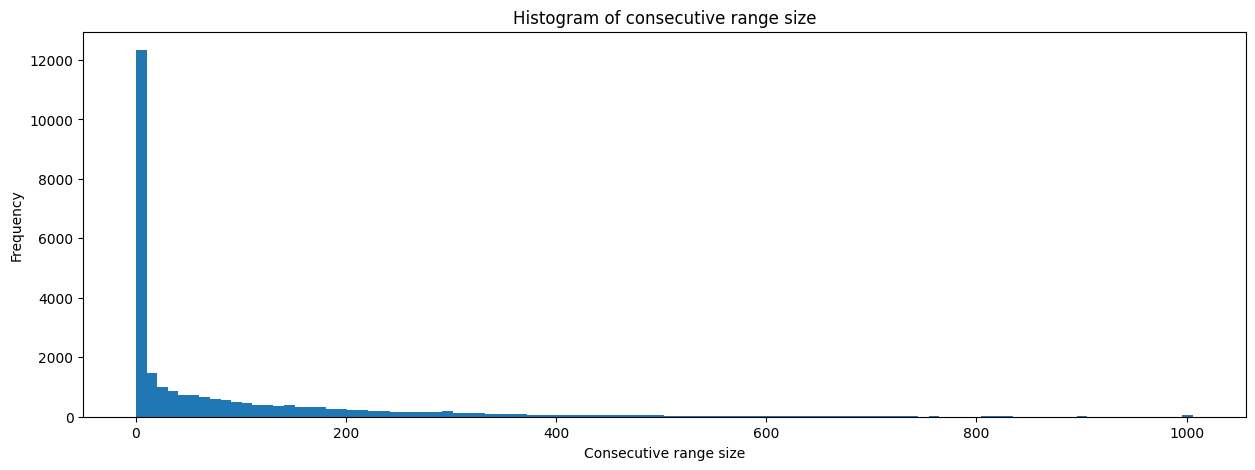

In [18]:
plt.figure(figsize=(15, 5))
plt.hist( [end - start for start, end in consecutive_ranges], bins=100)
plt.xlabel("Consecutive range size")
plt.ylabel("Frequency")
plt.title("Histogram of consecutive range size")
plt.show()


## Deal with the problem of discontinuities

In [59]:
# load data
data2 = load_data_pandas(data_file_name)
data2 = data2.to_numpy()

max_interp_width = 5

In [60]:
# Scan again the data to find time gaps in the first feature
# This time, when the gap is less than 3, we add the missing rows to the data, with the correct value of the index
# in the first feature, and Nan for the other features (we will deal with them later)
new_data = []
new_data.append(data2[0])

for i in range(1, len(data2)):
    if i % 100000 == 0:
        print(f"Checking row {i}")
    if data2[i, 0] == data2[i-1, 0] + 1:
        new_data.append(data2[i])
    elif data2[i, 0] - data2[i-1, 0] <= max_interp_width:
        for j in range(int(data2[i-1, 0] + 1), int(data2[i, 0])):
            new_row = np.zeros(data2.shape[1])
            new_row[0] = j
            new_row[1:] = [np.nan for _ in range(data2.shape[1] - 1)]
            new_data.append(new_row)
        new_data.append(data2[i])

new_data = np.array(new_data)

Checking row 100000
Checking row 200000
Checking row 300000
Checking row 400000
Checking row 500000
Checking row 600000
Checking row 700000
Checking row 800000
Checking row 900000
Checking row 1000000
Checking row 1100000
Checking row 1200000
Checking row 1300000
Checking row 1400000
Checking row 1500000
Checking row 1600000
Checking row 1700000
Checking row 1800000
Checking row 1900000
Checking row 2000000
Checking row 2100000
Checking row 2200000
Checking row 2300000


In [61]:
from utils import interpolate_missing_values
_ = interpolate_missing_values(new_data)

Percentage of missing values in the dataset:  0.033733150235076996
All missing values have been replaced
Feature 0 had 0 missing values
Feature 1 had 22160 missing values
Feature 2 had 22160 missing values
Feature 3 had 280084 missing values
Feature 4 had 280084 missing values
Feature 5 had 22160 missing values
Feature 6 had 280084 missing values
Feature 7 had 280084 missing values
Feature 8 had 22160 missing values
Feature 9 had 22160 missing values
Feature 10 had 22160 missing values
Feature 11 had 35024 missing values
Feature 12 had 35024 missing values
Feature 13 had 22162 missing values
Feature 14 had 35026 missing values
Feature 15 had 35026 missing values
Feature 16 had 22161 missing values
Feature 17 had 22161 missing values


In [62]:
df = pd.DataFrame(new_data)
df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
dtype: int64

In [63]:
# Lets see how many consecutive time ranges we have now
consecutive_ranges2 = find_consecutive_ranges(df)

Checking row 100000
Checking row 200000
Checking row 300000
Checking row 400000
Checking row 500000
Checking row 600000
Checking row 700000
Checking row 800000
Checking row 900000
Checking row 1000000
Checking row 1100000
Checking row 1200000
Checking row 1300000
Checking row 1400000
Checking row 1500000
Checking row 1600000
Checking row 1700000
Checking row 1800000
Checking row 1900000
Checking row 2000000
Checking row 2100000
Checking row 2200000
Checking row 2300000
Checking row 2400000


In [64]:
consecutive_ranges2[:10]

[(0.0, 1005.0),
 (1014.0, 2019.0),
 (2028.0, 3033.0),
 (3042.0, 3612.0),
 (3620.0, 4625.0),
 (4634.0, 5639.0),
 (5648.0, 5706.0),
 (5713.0, 6718.0),
 (6741.0, 7508.0),
 (7516.0, 8404.0)]

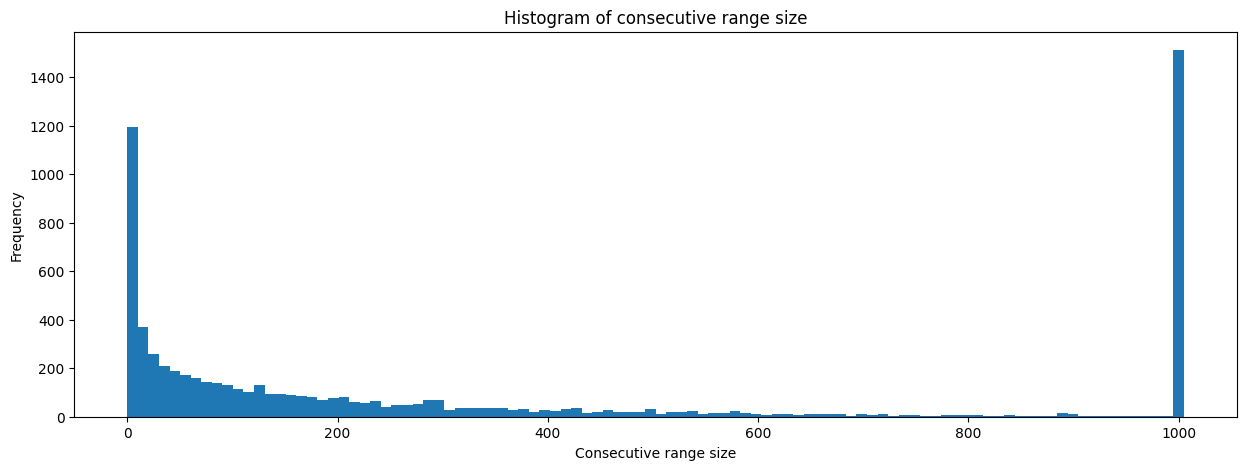

In [66]:
plt.figure(figsize=(15, 5))
plt.hist( [end - start for start, end in consecutive_ranges2], bins=100)
plt.xlabel("Consecutive range size")
plt.ylabel("Frequency")
plt.title("Histogram of consecutive range size")
plt.show()

## Stats about day of week and hour of day

In [ ]:
# 1. Add new column for day of the week in last position
data = np.insert(data, data.shape[1], 0, axis=1)
print("Adding day of the week feature")
for i in (range(len(data))):
    data[i, -1] = get_date_from_overalltime(data[i, 0]).weekday()

# 2. Add new column for hour of the day also in last position
data = np.insert(data, data.shape[1], 0, axis=1)
print("Adding hour of the day feature")
for i in (range(len(data))):
    data[i, -1] = get_date_from_overalltime(data[i, 0]).hour


Adding day of the week feature
Adding hour of the day feature


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


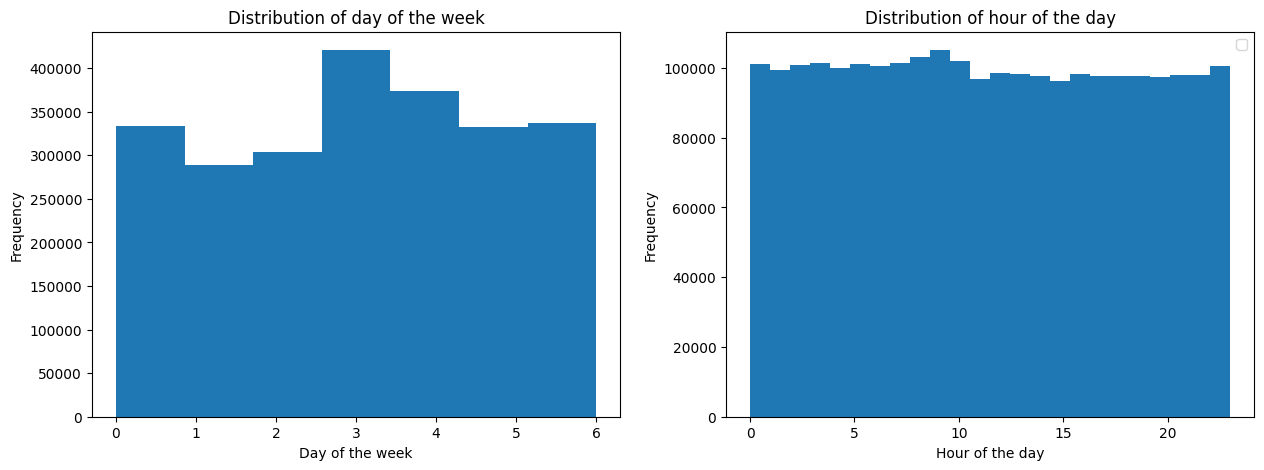

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(15, 5))
# Plot distribution of day of the week
ax[0].hist(data[:, -2], bins=7)
ax[0].set_title("Distribution of day of the week")
ax[0].set_xlabel("Day of the week")
ax[0].set_ylabel("Frequency")

# Plot distribution of hour of the day
ax[1].hist(data[:, -1], bins=24)
ax[1].set_title("Distribution of hour of the day")
ax[1].set_xlabel("Hour of the day")
ax[1].set_ylabel("Frequency")

plt.legend()
plt.show()


## What to do?
Cose da fare:
1. Capire bene che modello utilizzare:
    - CNN 1 Dimensional:
      - Causal / Non causal
      - Dilated?
    - Recurrent
      - LSTM
      - GRU
      - Attention
    - Transformer?
2. sulla base di questo capire quali funzioni di preprocessing implementare (crop, resize, normalizzazione, ecc.). Specialmente pensare a:
      - Sequence length ($l$): Visto che bisogna predirre i 10 secondi futuri, ci sarà bisogno almeno di 50/60 secondi di sequenza in input. Direi di partire da $l=50$, e scrivere codice pensando che bisognerà sperimentare anche con sequenze di lunghezze diverse (idealmente sarebbe bello vedere risultati per [30,40,50,60,70])
      - Sequence step size ($s$): farei circa di un terzo circa della sequence length. Quindi ad occhio potrebbe essere $s=15$.
      - Quali features tenere e quali scartare: questo aspetto è più delicato. Si può iniziare con tutte, e provare a rimuovere dopo.
3. Fare classe Rastro_Dataset che preveda un argomento agent_idx (dove agent_idx è l'indice dell'agente in [0,1,2,3,4,5]).
   - Se `agent_idx = -1` allora il dataset deve essere CENTRALIZZATO (contenere tutti i dati)
   - Se `agent_idx = i` \in [0,1,2,3,4,5] allora il dataset deve contenere solo i dati dell'agente i-esimo
4. Implementare primi esperimenti con dataset centralizzato
5. Implementare FedAvg e training federated

Use this paper for reference for experimental results:
https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=8581000



## PROBLEM: How do I make the splitting?

1. Take all the crops in one week, then split randomly those in train validation and test

The problem here is that I might have two subsequent samples (with fairly big overlap) in two different splits -> information leakage

2. Take first portion of the sequence for training, second portion for validation and third portion for test

The problem here is that one portion means one specific part of the week (we are reasoning w.r.t a single agent). But I want the DL model to be trained from ALL the days of the week, not just from one subportion, since I think different days of the week might have different patterns to learn from.

### Potential solution:

Subdivide the whole week in $m$ subsets, each containing mobile data sequences spanning 1 hour of measurements (or some other value) in total. Each of these subsets ONLY contains those sequences that are ENTIRELY included in this defined timespan. If a sequence contains samples taken in two different hours, we discard it (e.g sequence that goes from 12:59:45 to 13:00:35 will be discarded).
We then take this new collection of subsets and randomly split those in train, validation and test subsets.

In this way, each split contains data belonging to an etherogeneous set of days/hours, and we are sure that there is no leakage of information between the sets.




## Inspecting my dataset

In [ ]:
from dataset import Rastro_Dataset
from constants import CONFIG
from utils import SPLIT
import matplotlib.pyplot as plt

# Rastro_Dataset.generate_data(config=CONFIG)

train_dataset = Rastro_Dataset(config=CONFIG, agent_idx=-1, split=SPLIT.TRAIN)
valid_dataset = Rastro_Dataset(config=CONFIG, agent_idx=-1, split=SPLIT.VALIDATION)
test_dataset = Rastro_Dataset(config=CONFIG, agent_idx=-1, split=SPLIT.TEST)

In [ ]:
print(len(train_dataset))
print(len(valid_dataset))
print(len(test_dataset))

87364
10758
11296


In [ ]:
print(len(test_dataset))

11296


torch.Size([10, 3])
tensor([5., 6., 5., 6., 5., 6., 7., 6., 6., 5.], dtype=torch.float64)


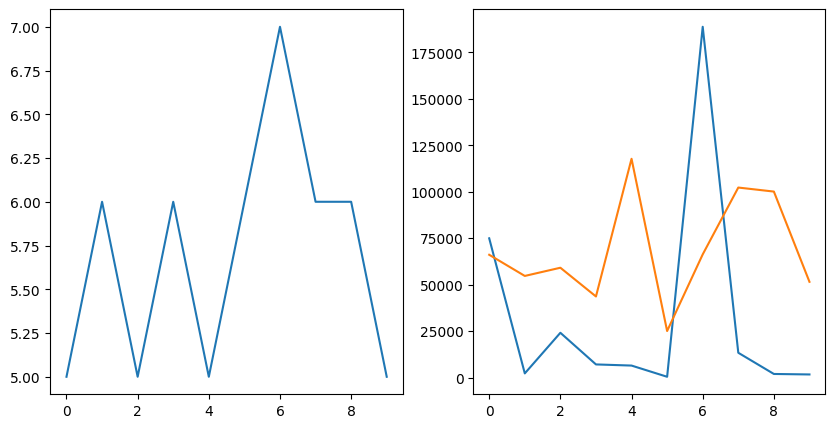

In [ ]:
for seq, target in test_dataset:
    print(target.shape)
    print(target[:,0])
    fig, ax = plt.subplots(1,2, figsize=(10,5))

    ax[0].plot(target[:,0])
    ax[1].plot(target[:,1])
    ax[1].plot(target[:,2])   
    plt.show()
    break

torch.Size([50, 19])


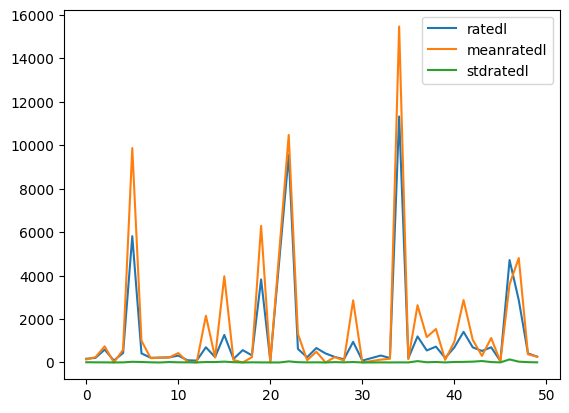

In [ ]:
for seq, target in test_dataset:
    print(seq.shape)

    plt.plot(seq[:,5], label="ratedl")
    plt.plot(seq[:,6], label="meanratedl")
    plt.plot(seq[:,7], label="stdratedl")

    plt.legend()
    plt.show()
    break

In [ ]:
import numpy as np 

data = np.array([[1,2,3],[4,5,6], [7,8,9]])
print(data)

x = np.delete(data, 0, axis=1)
print(x)

print(data)


[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[2 3]
 [5 6]
 [8 9]]
[[1 2 3]
 [4 5 6]
 [7 8 9]]


## Implement federated learning framework

TODO:
1. Install `flower` (`!pip install -q flwr[simulation] flwr_datasets[vision] `)
2. Implement classic FedAvg strategy
    
    2.1: PER FARLO HO BISOGNO DI ACCORPARE IL MODELLO IN UN SOLO nn.Module!!
    2.2: A questo punto posso pensare di reworkare il modello prima (CNN + RNN + Attention, potrebbe starci)
3. Test training both with SGD and Adam?

FAI UNA FUNZIONE PER PLOTTARE LA ROBA